# Plot for Clinical Application

In [1]:
import pandas as pd
import pandas as pd
from pathlib import Path
from config import *
from ppp_prediction.plot.utils import save_fig
import matplotlib.pyplot as plt

# setting global font as calibri

TableDir = PaperDir / "Table"
FigureDir = PaperDir / "Figure"
RawDataDir = PaperDir / "RawData"
plt.rcParams["font.family"] = "Calibri"

default_dpi = 400
%config InlineBackend.figure_format = "svg"
%config InlineBackend.print_figure_kwargs = {"dpi" : 300}

color_dict = {
    "Clinical": "#C48FA0",
    "Predicted Clinical": "#F2C886",
    "Predicted Clinical Full": "#88B9D6",
}

[0.0, 0.5, 1.0]
[0.0, 50.0, 100.0]
[0.0, 20.0, 40.0, 60.0, 80.0]


In [2]:
Figure4Dir = FigureDir / "Figure4"
SuppFig6Dir = FigureDir / "SuppFig6"
Figure4Dir.mkdir(parents=True, exist_ok=True)
SuppFig6Dir.mkdir(parents=True, exist_ok=True)

In [3]:
test_scores = pd.read_feather(RawDataDir / "ClinicalModelScores.feather")
to_cal_scores = ["Clinical", "Predicted Clinical", "Predicted Clinical Full"]

assoc_data_dict = pd.read_pickle(RawDataDir / "Assoc_data_dict_stenosis.pkl")
res_real = assoc_data_dict["Real"]
res_ummae = assoc_data_dict["Ummae"]

to_cal_assoc_data = pd.read_feather(RawDataDir / "to_cal_assoc_data.feather")

## Figure 4

### Figure 4b

In [4]:
to_plt_col = ["HDLC", "LDLC", "TC", "TG", "HbA1C%", "hsTnI"][::-1]

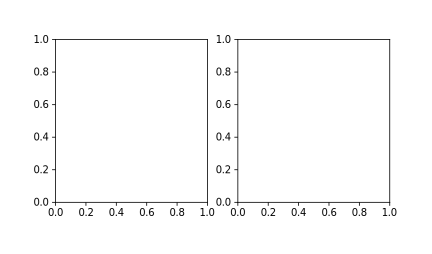

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt_data = res_real.sort_values("OR", ascending=False).query("x in @to_plt_col")
plt_data["x"] = pd.Categorical(plt_data["x"], to_plt_col)
plt_data = plt_data.sort_values("x")

cmap = sns.color_palette("coolwarm", as_cmap=True)
# sns.scatterplot(data=plt_data, x='OR', y="x", hue='OR', palette="coolwarm", ax=ax)
# assign color by coef value
ax = axes[0]
# close point to 0
ax.errorbar(
    x=plt_data["OR"],
    y=plt_data["x"],
    xerr=(
        plt_data["OR"] - plt_data["OR_LCI"],
        plt_data["OR_UCI"] - plt_data["OR"],
    ),
    fmt="none",
    capsize=2,
    # color="#377eb8",
    ecolor="black",
    zorder=1,
    lw=0.5,
    # pointsize=0,
    # capsize=5,
)

ax.scatter(
    x=plt_data["OR"],
    y=plt_data["x"],
    # c=plt_data['OR'],
    # cmap=cmap1,
    c="#4f99c7",
    s=40,
    alpha=1,
    edgecolors="black",
    linewidths=1,
    zorder=2,
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# show grid
ax.grid(
    True,
    alpha=0.2,
)

ax.axvline(1, linestyle="--", color="black", alpha=1, lw=1)
# ax.set_xlim(0.6, 1.4)
# ax.set_xlabel("Propotion of mediation")
# ax.set_ylabel("")
# save_fig(
#     fig,
#     mediationPlotDir / "Fig3B",
#     dpi=default_dpi,
# )
ax.set_title("Lab Measurement", fontsize=12)
ax.set_xlabel("OR/SD", fontsize=12)
# save_fig(fig, Figure3Dir / "Fig3C_Part_assoc", dpi=default_dpi)

Text(0.5, 32.0, 'OR/SD')

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

to_plt_col_ummae = [f"{tgt}_Ummae" for tgt in to_plt_col]
plt_data = res_ummae.sort_values("OR", ascending=False).query("x in @to_plt_col_ummae")
plt_data["x"] = plt_data["x"].str.replace("_Ummae", "")
plt_data["x"] = pd.Categorical(plt_data["x"], to_plt_col)
plt_data = plt_data.sort_values("x")

# fig, ax = plt.subplots(figsize=(3, 3))
ax = axes[1]
cmap = sns.color_palette("coolwarm", as_cmap=True)
# sns.scatterplot(data=plt_data, x='OR', y="x", hue='OR', palette="coolwarm", ax=ax)
# assign color by coef value

# close point to 0
ax.errorbar(
    x=plt_data["OR"],
    y=plt_data["x"],
    xerr=(
        plt_data["OR"] - plt_data["OR_LCI"],
        plt_data["OR_UCI"] - plt_data["OR"],
    ),
    fmt="none",
    capsize=2,
    # color="#377eb8",
    ecolor="black",
    zorder=1,
    lw=0.5,
    # pointsize=0,
    # capsize=5,
)

ax.scatter(
    x=plt_data["OR"],
    y=plt_data["x"],
    c="#d79593",
    s=40,
    alpha=1,
    edgecolors="black",
    linewidths=1,
    zorder=2,
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# show grid
ax.grid(
    True,
    alpha=0.2,
)

ax.axvline(1, linestyle="--", color="black", alpha=1, lw=1, zorder=0)
# ax.set_xlim(0.6, 2.2)
ax.set_title("Facial prediction", fontsize=12)
ax.set_xlabel("OR/SD", fontsize=12)
# ax.set_ylabel("")
# save_fig(
#     fig,
#     mediationPlotDir / "Fig3B",
#     dpi=default_dpi,
# )
# save_fig(fig, Figure3Dir / "Fig3C_Part_Ummae_assoc", dpi=default_dpi)

Text(0.5, 32.0, 'OR/SD')

In [8]:
save_fig(
    fig,
    Figure4Dir / "Figure4b",
    dpi=default_dpi,
    # transparent = True
)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


### Figure 4d

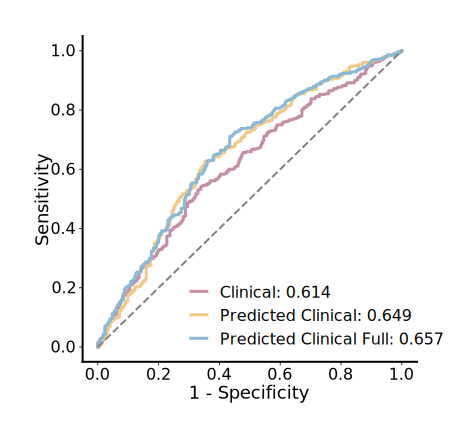

In [9]:
from ppp_prediction.plot.auc import get_auc_df, plot_auc_v1

fig, ax = plt.subplots(figsize=(6, 6))

center = "DX-EV"
plt_data = (
    test_scores[test_scores["DataSetName"] == center]
    .dropna(subset=["Stenosis", *color_dict.keys()])
    .copy()
)
# AUC number is not as same as before, is the test sample size diff casued by missing value of biomarkers as predictors.
plot_auc_v1(
    get_auc_df(
        data=plt_data,
        label="Stenosis",
        method_cols=list(color_dict.keys()),
    ),
    ax=ax,
    lw=3,
    palette=color_dict,
)
# save_fig(fig, Figure3Dir / "Fig3_AUCPlot", dpi=default_dpi)

save_fig(
    fig,
    Figure4Dir / "Figure4d",
    dpi=default_dpi,
    # transparent = True
)

### Figure 4e

In [10]:
# from ppp_prediction.viz import calibration_dot_plot
import statsmodels.api as sm

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import bootstrap


def get_risk_strat_df(data=None, y_true=None, y_pred=None, k=10, n_resample=1000):
    if data is not None:
        y_true = data[y_true]
        y_pred = data[y_pred]
    elif isinstance(y_true, pd.Series) and isinstance(y_pred, pd.Series):
        pass
    elif isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray):
        y_true = pd.Series(y_true)
        y_pred = pd.Series(y_pred)
    elif isinstance(y_true, list) and isinstance(y_pred, list):
        y_true = pd.Series(y_true)
        y_pred = pd.Series(y_pred)
    else:
        raise ValueError(
            "data should be a DataFrame or y_true and y_pred should be Series or list or numpy array"
        )

    plt_df = pd.DataFrame({"y_true": y_true, "y_pred": y_pred}).dropna()
    try:
        plt_df["y_pred_bins"] = pd.cut(
            plt_df["y_pred"],
            np.quantile(
                plt_df["y_pred"],
                [0, 0.2, 0.8, 1],
            ),
            labels=["Low Risk", "Medium Risk", "High Risk"],
        )
        # pd.qcut(
        #     plt_df["y_pred"],
        #     k,
        #     labels=[f"{i:.0f}" for i in (np.linspace(0, 1, k + 1) * 100)[1:]],
        # )
    except ValueError:
        raise ValueError("input data have many values are same and cannot be binned")
    if not n_resample:
        plt_df_group = (
            plt_df.groupby("y_pred_bins")
            .apply(lambda x: pd.Series({"mean_true": x.y_true.mean()}))
            .reset_index(drop=False)
        )
    else:

        def mean_bootstrap(data):
            res = bootstrap(data=(data,), statistic=np.mean, n_resamples=n_resample)

            return (
                np.mean(data),
                res.confidence_interval.low,
                res.confidence_interval.high,
            )

        plt_df_group = (
            plt_df.groupby("y_pred_bins")
            .apply(
                lambda x: pd.Series(
                    list(mean_bootstrap(x["y_true"])) + [x["y_pred"].mean()],
                    index=["mean_true", "ci_low", "ci_high", "mean_pred"],
                ).T
            )
            .reset_index(drop=False)
        )

    return plt_df_group

In [11]:
risk_df = pd.concat(
    [
        get_risk_strat_df(
            data=test_scores, y_true="Stenosis", y_pred=score, k=3
        ).assign(method=score)
        for score in to_cal_scores
    ],
    axis=0,
)
risk_df["Percentile"] = risk_df["y_pred_bins"]
risk_df["Risk"] = risk_df["mean_true"] * 100
risk_df["Model"] = risk_df["method"]
risk_df["Label"] = risk_df["Risk"].apply(lambda x: f"{x:.3f}%")
risk_df

,y_pred_bins,mean_true,ci_low,ci_high,mean_pred,method,Percentile,Risk,Model,Label
0,Low Risk,0.428571,0.350000,0.508764,-1.868910,Clinical,Low Risk,42.857143,Clinical,42.857%
1,Medium Risk,0.584323,0.538582,0.627078,-0.284172,Clinical,Medium Risk,58.432304,Clinical,58.432%
2,High Risk,0.716312,0.631206,0.787234,0.992466,Clinical,High Risk,71.631206,Clinical,71.631%
0,Low Risk,0.385714,0.314286,0.471429,-2.838159,Predicted Clinical,Low Risk,38.571429,Predicted Clinical,38.571%
1,Medium Risk,0.617577,0.572447,0.662708,-1.127517,Predicted Clinical,Medium Risk,61.757720,Predicted Clinical,61.758%
2,High Risk,0.666667,0.581560,0.730496,0.413069,Predicted Clinical,High Risk,66.666667,Predicted Clinical,66.667%
0,Low Risk,0.371429,0.300000,0.457143,-1.774134,Predicted Clinical Full,Low Risk,37.142857,Predicted Clinical Full,37.143%
1,Medium Risk,0.600950,0.553444,0.646081,0.038109,Predicted Clinical Full,Medium Risk,60.095012,Predicted Clinical Full,60.095%
2,High Risk,0.730496,0.652482,0.794326,1.613637,Predicted Clinical Full,High Risk,73.049645,Predicted Clinical Full,73.050%


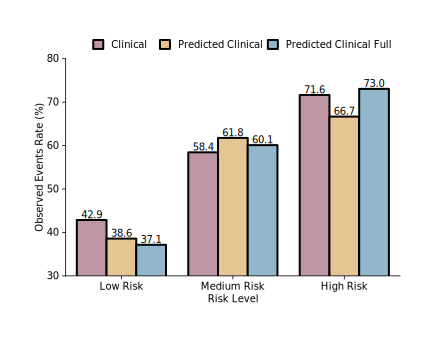

In [12]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(
    data=risk_df,
    x="y_pred_bins",
    y="Risk",
    hue="Model",
    palette=color_dict,
    dodge=True,
    edgecolor="black",
    lw=2,
    ax=ax,
)


for container in ax.containers:
    ax.bar_label(container, fmt="{:.1f}", label_type="edge")

# set legend at top
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title=None)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylabel("Observed Events Rate (%)")
ax.set_xlabel("Risk Level")
ax.set_ylim(30, 80)

save_fig(
    fig,
    Figure4Dir / "Figure4e",
    dpi=default_dpi,
    # transparent = True
)

### Figure 4f

In [13]:
plt_data = pd.read_csv(RawDataDir / "RelativeImportance_Cardiovascular_full.csv")

In [14]:
## cal ICC
# for Viz
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pingouin import intraclass_corr

icc_df = intraclass_corr(
    plt_data.melt(
        id_vars="Omics", value_vars=["Importance_Real", "Importance_Predicted"]
    ),
    targets="Omics",
    raters="variable",
    ratings="value",
).query("Type == 'ICC1'")
icc_df["ICC (95% CI)"] = (
    icc_df["ICC"].round(3).astype(str) + " " + icc_df["CI95%"].astype(str)
)
# print(icc_df)
icc, pval = icc_df["ICC"].values[0], icc_df["pval"].values[0]
print(f"ICC: {icc}, pval: {pval}")

ICC: 0.8589345362038937, pval: 1.7405942545095446e-07


In [20]:
icc_df

,Type,Description,ICC,F,df1,df2,pval,CI95%,ICC (95% CI)
0,ICC1,Single raters absolute,0.858935,13.177815,19,20,1.740594e-07,"[0.68, 0.94]",0.859 [0.68 0.94]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


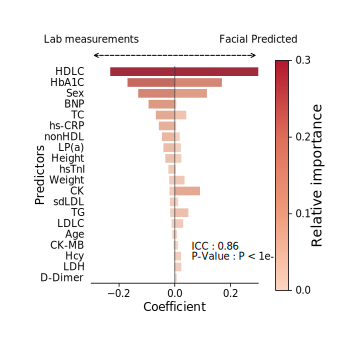

In [15]:
import matplotlib.colors as mcolors

cmap3 = mcolors.LinearSegmentedColormap.from_list(
    "my_colormap3",
    colors=[
        "#fdd5c0",
        "#ef9c7b",
        "#de6e58",
        "#b2182e",
    ],
)
norm = mcolors.TwoSlopeNorm(vmin=0, vcenter=0.15, vmax=0.3)

plt_data["Importance_Real_plt"] = plt_data["Importance_Real"] * -1
plt_data["Importance_Predicted_plt"] = plt_data["Importance_Predicted"]
# cal r and p
from scipy.stats import spearmanr, pearsonr

r, pval = pearsonr(plt_data["Importance_Real"], plt_data["Importance_Predicted"])
r

# plt
fig, ax = plt.subplots(figsize=(3, 4))
ax.axvline(x=0, color="black", lw=1, ls="-", alpha=0.5)
# ax.axvline(x=0.1, color="black", lw=1, ls="--", alpha=1)
# ax.axvline(x=-0.1, color="black", lw=1, ls="--", alpha=1)

# ax.axvline(x=0, color="black", lw=.7, ls="--", alpha=.5)
# ax.axvline(x=0.1, color="black", lw=.7, ls="--", alpha=.5)
# ax.axvline(x=-0.1, color="black", lw=.7, ls="--", alpha=.5)

sns.barplot(
    data=plt_data,
    y="Omics",
    x="Importance_Real_plt",
    hue="Importance_Real",
    palette=cmap3,
    ax=ax,
    legend=False,
    # edgecolor="black",
    # lw=.6,
    # linestyle='--'
)
sns.barplot(
    data=plt_data,
    y="Omics",
    x="Importance_Predicted_plt",
    # palette=cmap3,
    hue="Importance_Predicted",
    palette=cmap3,
    # palette=cmap,
    # hue_norm=norm,
    ax=ax,
    legend=False,
    # edgecolor="black",
    #  facecolor=(0, 0, 0, 0),
    # lw=1,
    # edgecolor="black",
)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
# ax.spines["bottom"].set_visible(False)
# set y axis line lw
# ax.tick_params(axis="x", which="both", left=False)
ax.tick_params(axis="y", which="both", left=False)
ax.set_xlabel("Coefficient", fontsize=12)
ax.set_ylabel("Predictors", fontsize=12)
ax.set_xlim(-0.3, 0.3)
# ax.grid(axis="x", ls="--", lw=1, alpha=1)

import matplotlib

cbax = plt.axes([0.98, 0.1, 0.06, 0.8])
cb = matplotlib.colorbar.ColorbarBase(
    cbax, cmap=cmap3, norm=norm, ticks=[0, 0.1, 0.2, 0.3]
)
cb.set_label(label="Relative importance", size=14)
# plt.figure(fig)
plt.tick_params(axis="y", which="both", left=False)

# plot arrow on the top with left means Predicted and right indicates Lab measurments
start = (0, 1.05)
end = (1, 1.05)

# 绘制双向箭头
ax.annotate(
    "",
    xy=end,
    xytext=start,
    arrowprops=dict(arrowstyle="<->", lw=1, color="black", linestyle="--"),
    # transform = ax.transAxes,
    xycoords="axes fraction",
    annotation_clip=False,
)

# 在箭头上方添加文字：左侧 "predicted"，右侧 "Lab measurements"
ax.text(
    start[0],
    start[1] + 0.05,
    "Lab measurements",
    ha="center",
    va="bottom",
    transform=ax.transAxes,
)
ax.text(
    end[0],
    end[1] + 0.05,
    "Facial Predicted",
    ha="center",
    va="bottom",
    transform=ax.transAxes,
)
ax.text(
    0.6,
    0.1,
    # f"Pearsonr : {r:.2f}\nP-Value : {pval if pval >1e-3 else 'P < 1e-3'}",
    f"ICC : {icc:.2f}\nP-Value : {pval if pval >1e-3 else 'P < 1e-3'}",
    ha="left",
    va="bottom",
    transform=ax.transAxes,
)

save_fig(
    fig,
    Figure4Dir / "Figure4f",
    dpi=default_dpi,
    # transparent = True
)

## Supplementary Fig. 6

#### Supplementary Figure 6a

In [16]:
cardio_vascular = [
    "BNP",
    "CK",
    "CK-MB",
    "D-Dimer",
    "HDLC",
    "HbA1C%",
    "Hcy",
    "LDH",
    "LDLC",
    "LPa",
    "TC",
    "TG",
    "hs-CRP",
    "hsTnI",
    "nonHDL",
    "sdLDL",
]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


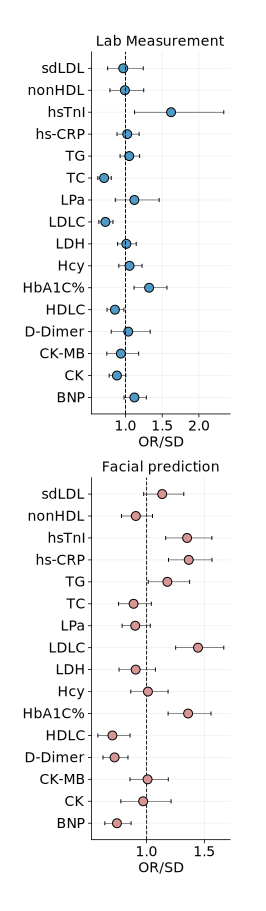

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3, 12))
to_plt_col = cardio_vascular
plt_data = res_real.sort_values("OR", ascending=False).query("x in @to_plt_col")
plt_data["x"] = pd.Categorical(plt_data["x"], to_plt_col)
plt_data = plt_data.sort_values("x")

cmap = sns.color_palette("coolwarm", as_cmap=True)
# sns.scatterplot(data=plt_data, x='OR', y="x", hue='OR', palette="coolwarm", ax=ax)
# assign color by coef value
ax = ax1
# close point to 0
ax.errorbar(
    x=plt_data["OR"],
    y=plt_data["x"],
    xerr=(
        plt_data["OR"] - plt_data["OR_LCI"],
        plt_data["OR_UCI"] - plt_data["OR"],
    ),
    fmt="none",
    capsize=2,
    # color="#377eb8",
    ecolor="black",
    zorder=1,
    lw=0.5,
    # pointsize=0,
    # capsize=5,
)

ax.scatter(
    x=plt_data["OR"],
    y=plt_data["x"],
    # c=plt_data['OR'],
    # cmap=cmap1,
    c="#4f99c7",
    s=80,
    alpha=1,
    edgecolors="black",
    linewidths=1,
    zorder=2,
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# show grid
ax.grid(
    True,
    alpha=0.2,
)

ax.axvline(1, linestyle="--", color="black", alpha=1, lw=1)
# ax.set_xlim(0.6, 1.4)
# ax.set_xlabel("Propotion of mediation")
# ax.set_ylabel("")
# save_fig(
#     fig,
#     mediationPlotDir / "Fig3B",
#     dpi=default_dpi,
# )
ax.set_title("Lab Measurement", fontsize=14)
ax.set_xlabel("OR/SD", fontsize=14)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)


ax = ax2
import seaborn as sns
import matplotlib.pyplot as plt

to_plt_col_ummae = [f"{tgt}_Ummae" for tgt in to_plt_col]
plt_data = res_ummae.sort_values("OR", ascending=False).query("x in @to_plt_col_ummae")
plt_data["x"] = plt_data["x"].str.replace("_Ummae", "")
plt_data["x"] = pd.Categorical(plt_data["x"], to_plt_col)
plt_data = plt_data.sort_values("x")

cmap = sns.color_palette("coolwarm", as_cmap=True)
# sns.scatterplot(data=plt_data, x='OR', y="x", hue='OR', palette="coolwarm", ax=ax)
# assign color by coef value

# close point to 0
ax.errorbar(
    x=plt_data["OR"],
    y=plt_data["x"],
    xerr=(
        plt_data["OR"] - plt_data["OR_LCI"],
        plt_data["OR_UCI"] - plt_data["OR"],
    ),
    fmt="none",
    capsize=2,
    # color="#377eb8",
    ecolor="black",
    zorder=1,
    lw=0.5,
    # pointsize=0,
    # capsize=5,
)

ax.scatter(
    x=plt_data["OR"],
    y=plt_data["x"],
    c="#d79593",
    s=80,
    alpha=1,
    edgecolors="black",
    linewidths=1,
    zorder=2,
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# show grid
ax.grid(
    True,
    alpha=0.2,
)

ax.axvline(1, linestyle="--", color="black", alpha=1, lw=1, zorder=0)
# ax.set_xlim(0.6, 2.2)
ax.set_title("Facial prediction", fontsize=14)
ax.set_xlabel("OR/SD", fontsize=14)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)


fig.tight_layout()
save_fig(
    fig,
    SuppFig6Dir / "suppFig6a",
    dpi=default_dpi,
    # transparent = True
)

#### Supplementary Figure 6b

In [18]:
plt_data

,x,y,cov,var,coef,std,z,pvalue,lower_ci,upper_ci,...,n_control,N,AUC,ACC,Macro_F1,Sensitivity,Specificity,APR,norm_x,model_type
0,BNP,Stenosis,Age + Sex + Height + Weight + BMI,BNP_Ummae,-0.295862,0.077741,-3.805757,1.413714e-04,-0.448231,-0.143493,...,None,1199,0.675382,0.646372,0.636147,0.651132,0.640625,0.747243,zscore,logistic
0,CK,Stenosis,Age + Sex + Height + Weight + BMI,CK_Ummae,-0.029749,0.113326,-0.262508,7.929297e-01,-0.251864,0.192366,...,None,1199,0.660524,0.649708,0.632563,0.692410,0.580357,0.737330,zscore,logistic
0,CK-MB,Stenosis,Age + Sex + Height + Weight + BMI,CK-MB_Ummae,0.008669,0.083488,0.103835,9.173005e-01,-0.154965,0.172303,...,None,1199,0.660729,0.667223,0.637373,0.762983,0.508929,0.736718,zscore,logistic
0,D-Dimer,Stenosis,Age + Sex + Height + Weight + BMI,D-Dimer_Ummae,-0.323994,0.075947,-4.266029,1.989828e-05,-0.472848,-0.175140,...,None,1199,0.675489,0.644704,0.634219,0.651132,0.636161,0.747023,zscore,logistic
0,HDLC,Stenosis,Age + Sex + Height + Weight + BMI,HDLC_Ummae,-0.350232,0.100287,-3.492284,4.789082e-04,-0.546792,-0.153673,...,None,1199,0.673230,0.664721,0.643427,0.727031,0.562500,0.746294,zscore,logistic
0,HbA1C%,Stenosis,Age + Sex + Height + Weight + BMI,HbA1C%_Ummae,0.307020,0.069454,4.420472,9.848555e-06,0.170892,0.443147,...,None,1199,0.678426,0.658882,0.642321,0.699068,0.593750,0.756384,zscore,logistic
0,Hcy,Stenosis,Age + Sex + Height + Weight + BMI,Hcy_Ummae,0.011981,0.081025,0.147872,8.824440e-01,-0.146824,0.170787,...,None,1199,0.660896,0.646372,0.631225,0.679095,0.593750,0.736729,zscore,logistic
0,LDH,Stenosis,Age + Sex + Height + Weight + BMI,LDH_Ummae,-0.099018,0.088141,-1.123399,2.612680e-01,-0.271771,0.073736,...,None,1199,0.662316,0.665555,0.638857,0.749667,0.526786,0.737298,zscore,logistic
0,LDLC,Stenosis,Age + Sex + Height + Weight + BMI,LDLC_Ummae,0.368027,0.073250,5.024276,5.053351e-07,0.224460,0.511594,...,None,1199,0.679689,0.666389,0.646112,0.724368,0.571429,0.747100,zscore,logistic
0,LPa,Stenosis,Age + Sex + Height + Weight + BMI,LPa_Ummae,-0.103026,0.068664,-1.500443,1.334996e-01,-0.237604,0.031552,...,None,1199,0.663333,0.652210,0.634490,0.697736,0.578125,0.739222,zscore,logistic


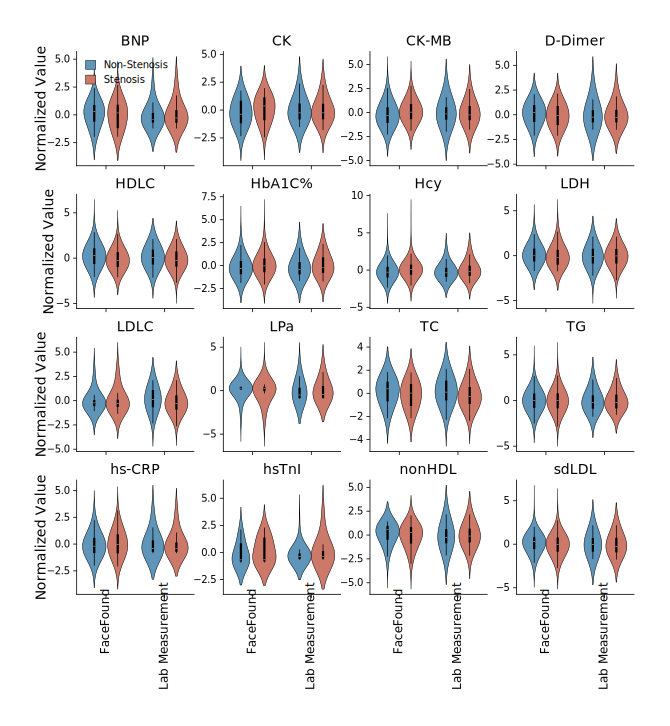

In [19]:
need_cols = cardio_vascular

predicted_cols = [f"{col}_Ummae" for col in need_cols]
plt_data_raw = to_cal_assoc_data[
    need_cols + predicted_cols + ["eid", "Stenosis"]
].copy()
plt_data_raw[need_cols + predicted_cols] = (
    plt_data_raw[need_cols + predicted_cols]
    - plt_data_raw[need_cols + predicted_cols].mean()
) / plt_data_raw[need_cols + predicted_cols].std()
# predicted

plt_data_predicted = (
    plt_data_raw[predicted_cols + ["eid"]]
    .copy()
    .melt(id_vars=["eid"], value_vars=predicted_cols)
)
plt_data_predicted["variable"] = plt_data_predicted["variable"].str.replace(
    "_Ummae", ""
)
plt_data_real = (
    plt_data_raw[need_cols + ["eid"]].copy().melt(id_vars=["eid"], value_vars=need_cols)
)

plt_data = pd.concat(
    [
        plt_data_predicted.assign(Group="FaceFound"),
        plt_data_real.assign(Group="Lab Measurement"),
    ]
).merge(plt_data_raw[["eid", "Stenosis"]])

plt_data = plt_data.rename(columns={"value": "Normalized Value"})
plt_data["Stenosis"] = pd.Categorical(
    plt_data["Stenosis"].astype(int).replace({1: "Stenosis", 0: "Non-Stenosis"}),
    categories=["Non-Stenosis", "Stenosis"],
    ordered=True,
)


plt_system_order = {}
plot_group_by = "variable"
plt_value = "Normalized Value"
x = "Group"
hue = "Stenosis"

subgroup_order = (
    plt_data[plot_group_by].value_counts().sort_values(ascending=False).index.tolist()
)
plt_data[plot_group_by] = pd.Categorical(
    plt_data[plot_group_by], subgroup_order, ordered=True
)
col_numbers = plt_data[plot_group_by].nunique()


# width_ratios = [subdata[x].nunique() for _, subdata in plt_data.groupby(plot_group_by)]
fig, axes = plt.subplots(
    4,
    4,
    # figsize=(sum(width_ratios) * 0.4, 4),
    figsize=(10, 10),
    sharex=True,
    gridspec_kw={"wspace": 0.25, "hspace": 0.25},
)
axes = axes.flatten()
for i, (system, system_df) in enumerate(plt_data.groupby(plot_group_by)):

    ax = axes[i]
    # set order of x
    system_df[x] = system_df[x].astype(str)
    # order = system_df[x].unique()
    # order = [x for x in order if x in subgroup_order

    # system_df = system_df.query("Model == 'Ummae'")

    ax = sns.violinplot(
        x=x,
        y=plt_value,
        data=system_df,
        ax=ax,
        hue=hue,
        palette={"Stenosis": "#de6e58", "Non-Stenosis": "#4f99c7"},
        edgecolor="black",
        fill=True,
        # bw =
        bw_adjust=4,
        #  inner_kws=dict(box_width=15, whis_width=2, color=".8"),
        linewidth=0.5,
        alpha=1,
    )
    #

    ax.set_xlabel("")

    if i % 4 != 0:
        # ax.tick_params(axis="y", which="both", left=False, labelleft=False)
        ax.set_ylabel("")
    else:
        ax.set_ylabel("Normalized Value", fontsize=14)
    plt.setp(ax.get_xticklabels(), rotation=90, fontsize=12)
    from matplotlib.patches import Rectangle
    import textwrap

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_title(system, fontsize=14)
    if i != 0:
        ax.legend().set_visible(False)
    else:
        ax.legend(loc="upper left", bbox_to_anchor=(0, 1), frameon=False)

save_fig(
    fig,
    SuppFig6Dir / "suppFig6b",
    dpi=default_dpi,
    # transparent = True
)